## Neighborhood Operations, Kernals and Filters
In computer vision and image processing a neighborhood operation is a commonly used class of computations on image data which implies that it is processed according to the following pseudo code:

```
Visit each point p in the image data and do {
    N = a neighborhood or region of the image data around the point p
    result(p) = f(N)
}
```
This general procedure can be applied to image data of arbitrary dimensionality. Also, the image data on which the operation is applied does not have to be defined in terms of intensity or color, it can be any type of information which is organized as a function of spatial (and possibly temporal) variables in p.

The result of applying a neighborhood operation on an image is again something which can be interpreted as an image, it has the same dimension as the original data. The value at each image point, however, does not have to be directly related to intensity or color. Instead it is an element in the range of the function f, which can be of arbitrary type.

Normally the neighborhood N is of fixed size and is a square (or a cube, depending on the dimensionality of the image data) centered on the point p. Also the function f is fixed, but may in some cases have parameters which can vary with p, see below.

In the simplest case, the neighborhood N may be only a single point. This type of operation is often referred to as a point-wise operation.

[Visual demo from setosa.io](https://setosa.io/ev/image-kernels/)

### Convolution
See also: Symmetric convolution
Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. The matrix operation being performed—convolution—is not traditional matrix multiplication, despite being similarly denoted by *.

For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and multiplying locally similar entries and summing. The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel:

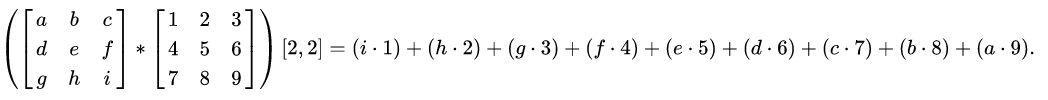

The other entries would be similarly weighted, where we position the center of the kernel on each of the boundary points of the image, and compute a weighted sum.

The values of a given pixel in the output image are calculated by multiplying each kernel value by the corresponding input image pixel values. This can be described algorithmically with the following pseudo-code:

### Few Famous and usefull Kernels
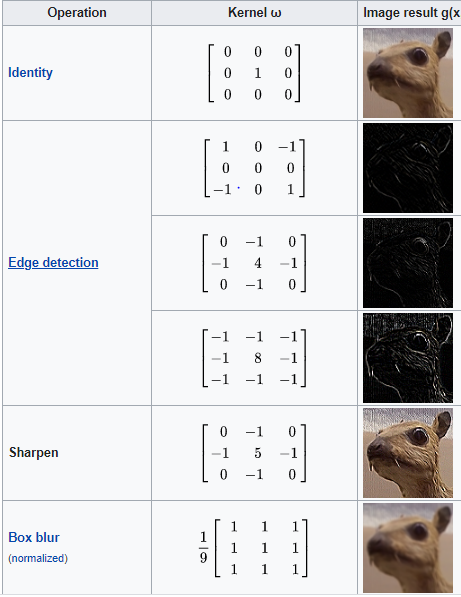

blur = cv2.blur(img,(5,5)

### Sobel Kernels
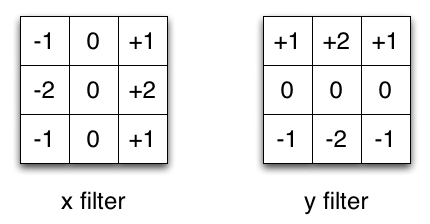

In [ ]:
import cv2

img=cv2.imread('Samples/sample.jpg')

from matplotlib import pyplot as plt

plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#gray-result image, img-source image
#cv2.COLOR_BGR2GRAY-color conversion method
#cvtColor function is used to convert color
plt.imshow(gray,cmap='gray')

In [ ]:
import numpy as np

kernel=np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

In [ ]:
kernel=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

In [ ]:
kernel=np.array([[0.25,0,0.75],
                 [0,0,0.4],
                 [0.8,0,2.5]],np.float)

conv=cv2.filter2D(gray,-1,kernel)
plt.imshow(conv,cmap='gray')

## Example 1 - Lane Detection using Edge Detection using Sobel Kernels

In [ ]:
source=cv2.VideoCapture('Samples/road_drive.avi')
kernel=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]],np.float)
while(True):
    
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    conv=cv2.filter2D(gray,-1,kernel)
    ret, thresh = cv2.threshold(conv, 100, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area=cv2.contourArea(cnt)
        #print(area)
        if(area>50):
            cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
            #x,y,w,h = cv2.boundingRect(cnt)
            #img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)            
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img,[box],0,(0,0,255),2)
            
    cv2.imshow('LIVE',img)
    cv2.imshow('conv',conv)
    cv2.imshow('thresh',thresh)
    key=cv2.waitKey(100)

    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## Morphological Operations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play. We will see them one-by-one with help of following image:

1. Erosion: The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what it does? The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

[Erosion Example](https://www.youtube.com/watch?v=b5lgnNEzGeU)

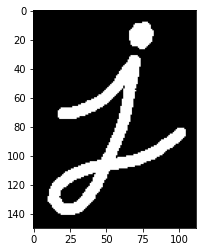

In [17]:
import cv2
from matplotlib import pyplot as plt

img=cv2.imread('Samples/j.png')
plt.imshow(img,cmap='gray')

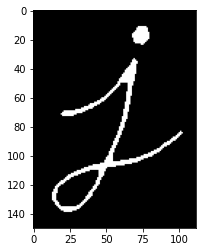

In [18]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')

2. Dilation: It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilate,cmap='gray')

3. Opening: Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

In [ ]:
img=cv2.imread('Samples/opening.png')
plt.imshow(img,cmap='gray')

In [ ]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

In [ ]:
img=cv2.imread('Samples/closing.png')
plt.imshow(img,cmap='gray')

In [ ]:
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

## Application -1 

In [ ]:
frame=cv2.imread('test_images/0 (238).jpg')

print(frame.shape)

lower_color = np.array((45,45,45))
upper_color = np.array((50,50,50))

mask=cv2.inRange(frame, lower_color, upper_color)

kernel = np.ones((5,5),np.uint8)
dilate = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area=cv2.contourArea(cnt)
    print(area)
    if(area>4000):
        cv2.drawContours(frame, [cnt], -1, (0,255,255), 2)
        x,y,w,h = cv2.boundingRect(cnt)
        print(x,y,w,h)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)

cv2.imshow('frame',frame)
cv2.imshow('mask',mask)
cv2.imshow('dilate',dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Application - 2

In [32]:
import cv2
import numpy as np

img = cv2.imread('Samples/sl-coins-2.jpg')
img=cv2.resize(img,(0,0),fx=0.5,fy=0.5)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 220, 255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 2)

contours,hiearchy=cv2.findContours(erosion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#cv2.drawContours(img, contours,-1, (0,0,255), 3)

for i,cnt in enumerate(contours):
    
    area=cv2.contourArea(cnt)
    print(i,area,sep='-')
    if(area>10000):
        pass
        cv2.drawContours(img,[cnt],-1, (0,0,255), 3)
        
cv2.imshow('thresh',thresh)
cv2.imshow('erosion',erosion)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

0-29.5
1-0.0
2-0.0
3-0.0
4-5.0
5-0.0
6-0.5
7-31.0
8-0.5
9-16.0
10-3.0
11-36.0
12-0.5
13-13.5
14-8.0
15-164.0
16-13.0
17-0.5
18-0.0
19-2.0
20-0.5
21-27.0
22-0.0
23-0.0
24-0.0
25-0.0
26-13.5
27-31.0
28-0.0
29-0.0
30-64.0
31-0.0
32-316.0
33-260.5
34-3.5
35-20.0
36-9.5
37-0.0
38-14.0
39-2.0
40-5.0
41-0.0
42-465.0
43-62.5
44-4.5
45-165780.0
46-208.0
47-117.5
48-128.0
49-208.0
50-98.0
51-98.0
52-629.0
53-128.5
54-98.0
55-98.0
56-108.0
57-118.0
58-98.0
59-117.5
60-98.0
61-98.0
62-98.0
63-98.0
64-119.0
65-210.0
66-324.5
67-98.0
68-125.0
69-128.5
70-387.0
71-98.0
72-263.5
73-108.0
74-108.0
75-98.0
76-208.0
77-146.0
78-98.0
79-289.0
80-98.0
81-188.0
82-187.0
83-220.5
84-118.0
85-179.0
86-98.0
87-98.0
88-265.5
89-182.0
90-146.0
91-365.0
92-138.0
93-108.0
94-125.0
95-108.0
96-168.0
97-98.0
98-117.5
99-167.5
100-188.0
101-98.0
102-108.0
103-108.0
104-98.0
105-481.5
106-161.0
107-138.0
108-128.0
109-372.0
110-192.0
111-118.0
112-116.0
113-172.0
114-117.5
115-98.0
116-98.0
117-206.0
118-448.0
119-178

## Canny Edge Detection

Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

1. Noise Reduction
Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

2. Finding Intensity Gradient of the Image
Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). From these two images, we can find edge gradient and direction for each pixel as follows:

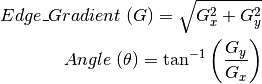

## Example 2 - Lane Detection using Edge Detection using Canny Edge detection

In [ ]:
source=cv2.VideoCapture('Samples/road_drive.avi')
kernel=np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]],np.float)
while(True):
    
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    conv=cv2.Canny(gray,100,200)
    ret, thresh = cv2.threshold(conv, 100, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area=cv2.contourArea(cnt)
        #print(area)
        if(area>50):
            cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
            #x,y,w,h = cv2.boundingRect(cnt)
            #img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)            
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(img,[box],0,(0,0,255),2)
            
    cv2.imshow('LIVE',img)
    cv2.imshow('conv',conv)
    cv2.imshow('thresh',thresh)
    key=cv2.waitKey(100)

    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()